In [2]:
# Clear all
    rm(list=ls())

In [3]:
# Reads CIBC CSV file
    CIBC_Data <- read.csv("CIBC_Data.csv", header=TRUE)
  
  # Lists first 6 rows
    head(CIBC_Data)
  
  # Indicates the number of observations and number of variables
    dim(CIBC_Data)

,Year,Subsector,Province,Occupational.Group,QTR,All.Employees...Total,All.Employees...M,Male,All.Employees...F,Female,⋯,Aboriginal.Peoples...M,Aboriginal.Peoples...F,Persons.with.Disabilities...Total,PwD,Persons.with.Disabilities...M,Persons.with.Disabilities...F,Members.of.Visible.Minorities...Total,RP,Members.of.Visible.Minorities...M,Members.of.Visible.Minorities...F
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2017,Depository Credit Intermediation,National,Senior Managers,4,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2017,Depository Credit Intermediation,National,Senior Managers,3,4,3,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
3,2017,Depository Credit Intermediation,National,Senior Managers,2,8,6,1,2,1,⋯,0,0,2,1,1,1,1,1,1,0
4,2017,Depository Credit Intermediation,National,Senior Managers,1,236,168,1,68,1,⋯,1,0,20,1,16,4,31,1,23,8
5,2017,Depository Credit Intermediation,National,Middle and Other Managers,4,2,1,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
6,2017,Depository Credit Intermediation,National,Middle and Other Managers,3,12,10,1,2,1,⋯,0,0,2,1,1,1,5,1,4,1


[1] 3408   23

In [4]:
    library(ggplot2)
    library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [5]:
## Data Cleaning

    # Removes missing values
      s = sum(is.na(CIBC_Data))
    
    # New dataset after removing missing values is CIBC. Done this way to avoid overwriting original file
      CIBC <- na.omit(CIBC_Data)
    
    # Renames specific column by stating the column number
      names(CIBC)[1] <- "Year"
      names(CIBC)[6] <- "Total_Employees"
      names(CIBC)[9] <- "Total_Women_Employees"
      names(CIBC)[10] <- "Woman"
      names(CIBC)[11] <- "Woman_Dominated"
      
    # Filters data to only include observations from 2017  
      CIBC <- CIBC[CIBC$Year == "2017",]
  

In [16]:
        
    head(CIBC)
    
  # Variables changed to numeric type
  # QTR changed to numeric type for correlation calculations
      CIBC$QTR <- as.numeric(CIBC$QTR)
      is.numeric(CIBC$QTR)
      summary(CIBC$QTR)
      
      CIBC$Male <- as.numeric(CIBC$Male)
      is.numeric(CIBC$Male)
      summary(CIBC$Male)
      
      CIBC$Woman <- as.numeric(CIBC$Woman)
      is.numeric(CIBC$Woman)
      summary(CIBC$Woman)
      
      CIBC$Woman_Dominated <- as.numeric(CIBC$Woman_Dominated)
      is.numeric(CIBC$Woman_Dominated)
      summary(CIBC$Woman_Dominated)
      
      CIBC$Total_Women_Employees <- as.numeric(CIBC$Total_Women_Employees)
      is.numeric(CIBC$Total_Women_Employees)
      summary(CIBC$Total_Women_Employees)
      
      CIBC$Indigenous <- as.numeric(CIBC$Indigenous)
      is.numeric(CIBC$Indigenous)
      summary(CIBC$Indigenous)
      
      CIBC$PwD <- as.numeric(CIBC$PwD)
      is.numeric(CIBC$PwD)
      summary(CIBC$PwD)
      
      summary(CIBC)
      str(CIBC)


,Year,Subsector,Province,Occupational.Group,QTR,Total_Employees,All.Employees...M,Male,Total_Women_Employees,Woman,⋯,Aboriginal.Peoples...M,Aboriginal.Peoples...F,Persons.with.Disabilities...Total,PwD,Persons.with.Disabilities...M,Persons.with.Disabilities...F,Members.of.Visible.Minorities...Total,RP,Members.of.Visible.Minorities...M,Members.of.Visible.Minorities...F
,<int>,<fct>,<fct>,<fct>,<ord>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,2017,Depository Credit Intermediation,National,Senior Managers,4,1,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,2017,Depository Credit Intermediation,National,Senior Managers,3,4,3,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
3,2017,Depository Credit Intermediation,National,Senior Managers,2,8,6,1,2,1,⋯,0,0,2,1,1,1,1,1,1,0
4,2017,Depository Credit Intermediation,National,Senior Managers,1,236,168,1,68,1,⋯,1,0,20,1,16,4,31,1,23,8
5,2017,Depository Credit Intermediation,National,Middle and Other Managers,4,2,1,1,1,1,⋯,0,0,0,0,0,0,1,1,1,0
6,2017,Depository Credit Intermediation,National,Middle and Other Managers,3,12,10,1,2,1,⋯,0,0,2,1,1,1,5,1,4,1


[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.75    2.50    2.50    3.25    4.00 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.7955  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  1.0000  1.0000  0.8182  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4318  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.0     6.5   387.0   134.0  6561.0 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4773  1.0000  1.0000 

[1] TRUE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.6136  1.0000  1.0000 

      Year                                 Subsector      Province 
 Min.   :2017                                   : 0           : 0  
 1st Qu.:2017   Depository Credit Intermediation:44   National:44  
 Median :2017                                                      
 Mean   :2017                                                      
 3rd Qu.:2017                                                      
 Max.   :2017                                                      
                                                                   
                                    Occupational.Group      QTR      
 Administrative and Senior Clerical Personnel: 4       Min.   :1.00  
 Clerical Personnel                          : 4       1st Qu.:1.75  
 Intermediate Sales and Service Personnel    : 4       Median :2.50  
 Middle and Other Managers                   : 4       Mean   :2.50  
 Professionals                               : 4       3rd Qu.:3.25  
 Semi-Professionals and Technicians 

'data.frame':	44 obs. of  23 variables:
 $ Year                                 : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Subsector                            : Factor w/ 2 levels "","Depository Credit Intermediation": 2 2 2 2 2 2 2 2 2 2 ...
 $ Province                             : Factor w/ 2 levels "","National": 2 2 2 2 2 2 2 2 2 2 ...
 $ Occupational.Group                   : Factor w/ 13 levels "","Administrative and Senior Clerical Personnel",..: 10 10 10 10 5 5 5 5 7 7 ...
 $ QTR                                  : num  4 3 2 1 4 3 2 1 4 3 ...
 $ Total_Employees                      : int  1 4 8 236 2 12 574 4965 1 4 ...
 $ All.Employees...M                    : int  1 3 6 168 1 10 416 2453 0 3 ...
 $ Male                                 : num  1 1 1 1 1 1 1 1 0 1 ...
 $ Total_Women_Employees                : num  0 1 2 68 1 ...
 $ Woman                                : num  0 1 1 1 1 1 1 1 1 1 ...
 $ Woman_Dominated                      : num  0 0 0 0 0 0

In [17]:
    # Variable Matrix to retrieve following variables: QTR, Total_Women_Employees, Indigenous and PwD (Persons with Disabilities)
    # QTR represents salary quartile, Total_Women_Employees represents the number of women employees per occupational group per salary quartile
    # Indigenous is binary variable representing whether individual is an Indigenous person
    # PwD is binary variable representing whether individual has a disability status
      Matrix <- CIBC[, c(5,9,13,17)]
    # Prints the first 6 rows
      head(Matrix, 6)
    
      res <- cor(Matrix)
    # Rounds to 2 decimal places
      round(res, 2)

,QTR,Total_Women_Employees,Indigenous,PwD
,<dbl>,<dbl>,<dbl>,<dbl>
1,4,0,0,0
2,3,1,0,0
3,2,2,0,1
4,1,68,1,1
5,4,1,0,0
6,3,2,0,1


,QTR,Total_Women_Employees,Indigenous,PwD
QTR,1.00,-0.38,-0.59,-0.56
Total_Women_Employees,-0.38,1.00,0.36,0.27
Indigenous,-0.59,0.36,1.00,0.57
PwD,-0.56,0.27,0.57,1.00


In [9]:
install.packages("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


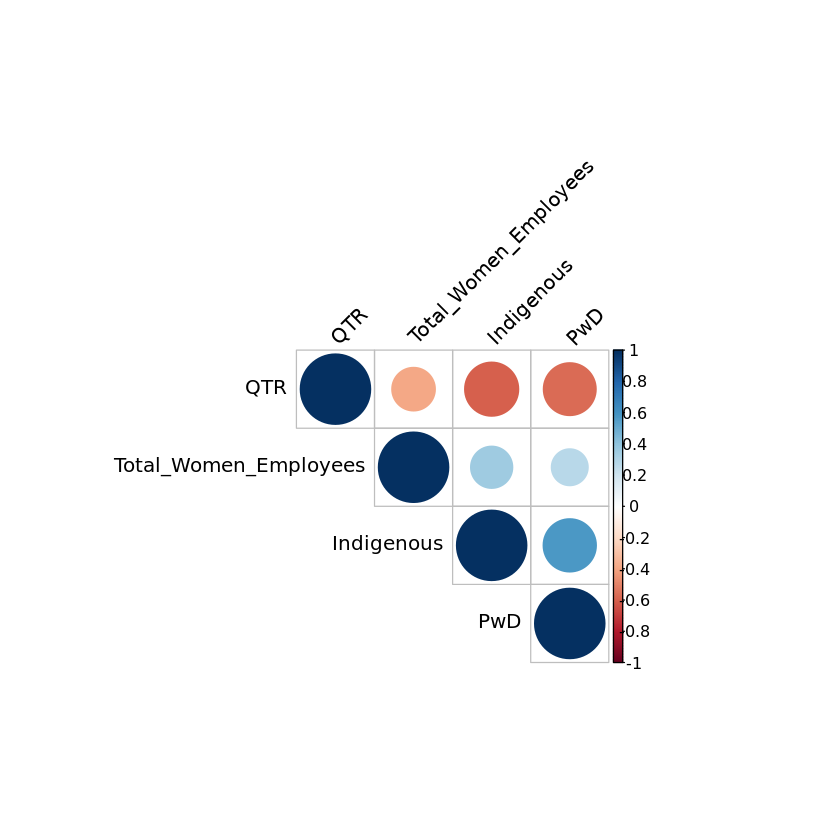

In [18]:
    # Correlogram Visual
      library(corrplot)
      corrplot(res, type = "upper", order = "hclust", 
               tl.col = "black", tl.srt = 45)

In [19]:
    # Covariance Matrix
      res <- cov(Matrix)
      # Rounds to 2 decimal places
      round(res, 2)

,QTR,Total_Women_Employees,Indigenous,PwD
QTR,1.28,-487.53,-0.34,-0.31
Total_Women_Employees,-487.53,1267178.46,204.05,151.99
Indigenous,-0.34,204.05,0.26,0.14
PwD,-0.31,151.99,0.14,0.24


In [20]:
    # QTR changed back to factor type
        CIBC$QTR = factor(CIBC$QTR, levels = c("1", "2", "3", "4"), ordered = TRUE) 
        is.factor(CIBC$QTR)
        summary(CIBC$QTR)

[1] TRUE

1  2  3  4 
11 11 11 11

In [14]:
install.packages("ggpubr")

Warning message:
“dependency ‘pbkrtest’ is not available”also installing the dependencies ‘openxlsx’, ‘RcppEigen’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’

Warning message in install.packages("ggpubr"):
“installation of package ‘car’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘rstatix’ had non-zero exit status”Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [21]:
install.packages("ggthemes")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [22]:
install.packages("GGally")

also installing the dependency ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [23]:
install.packages("vcd")

also installing the dependency ‘lmtest’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


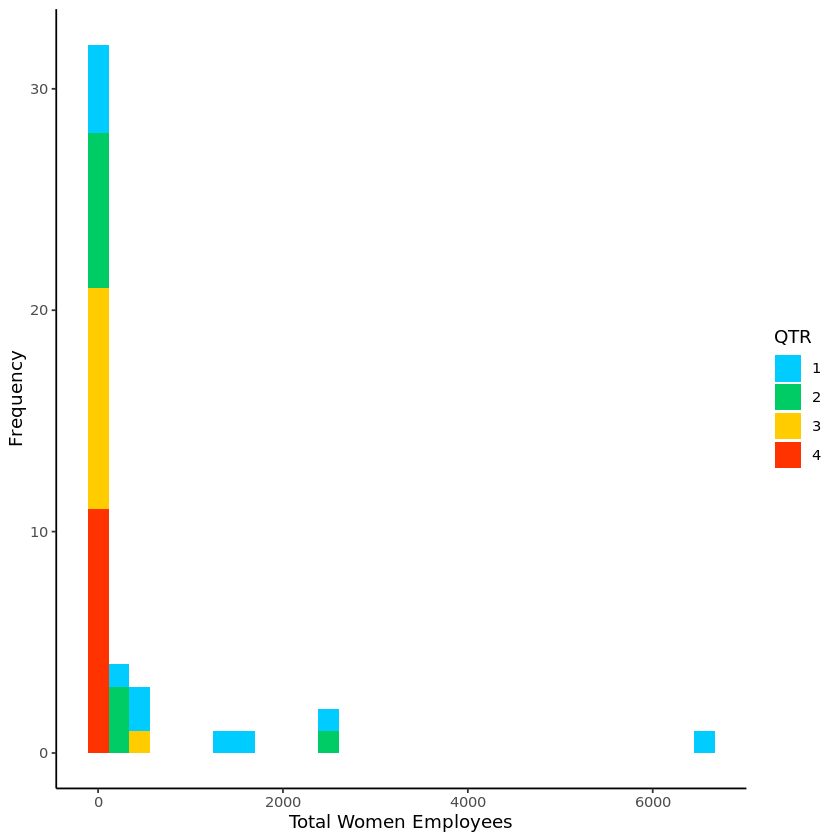

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


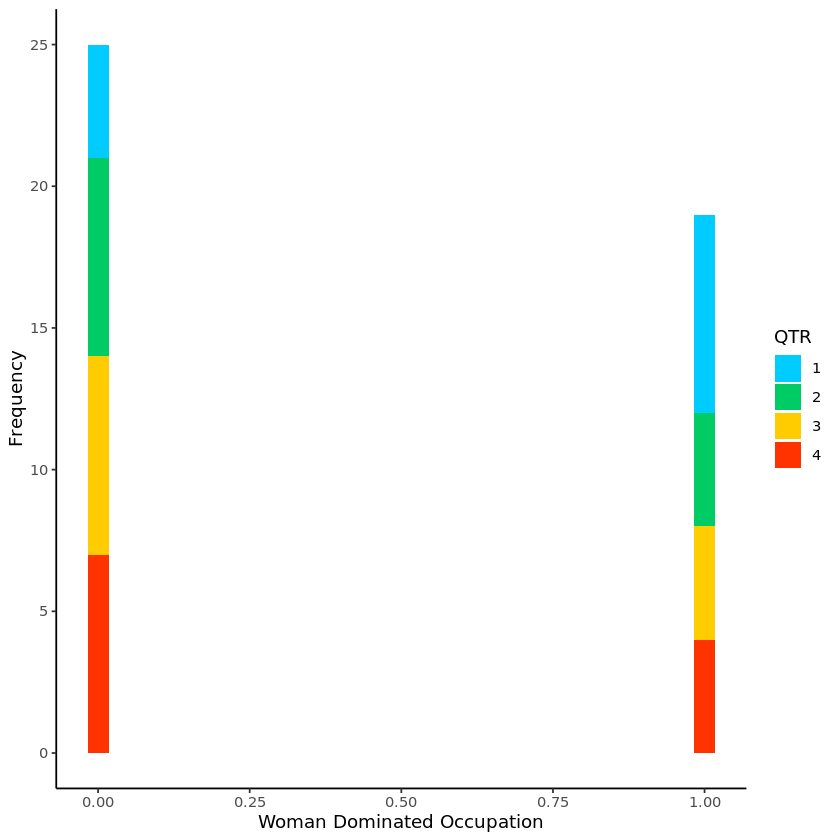

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


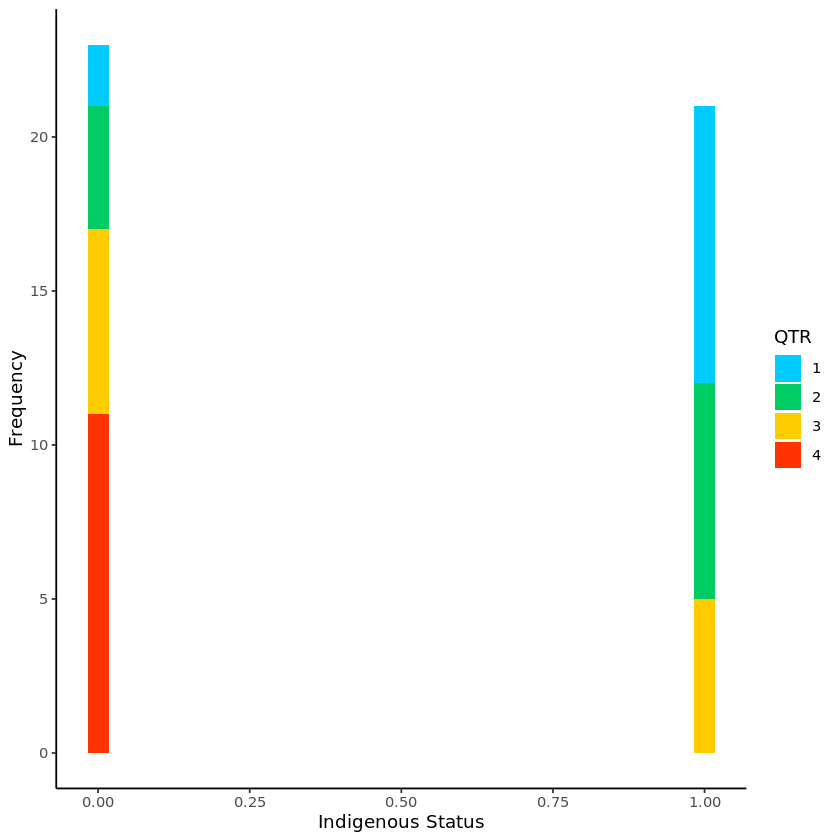

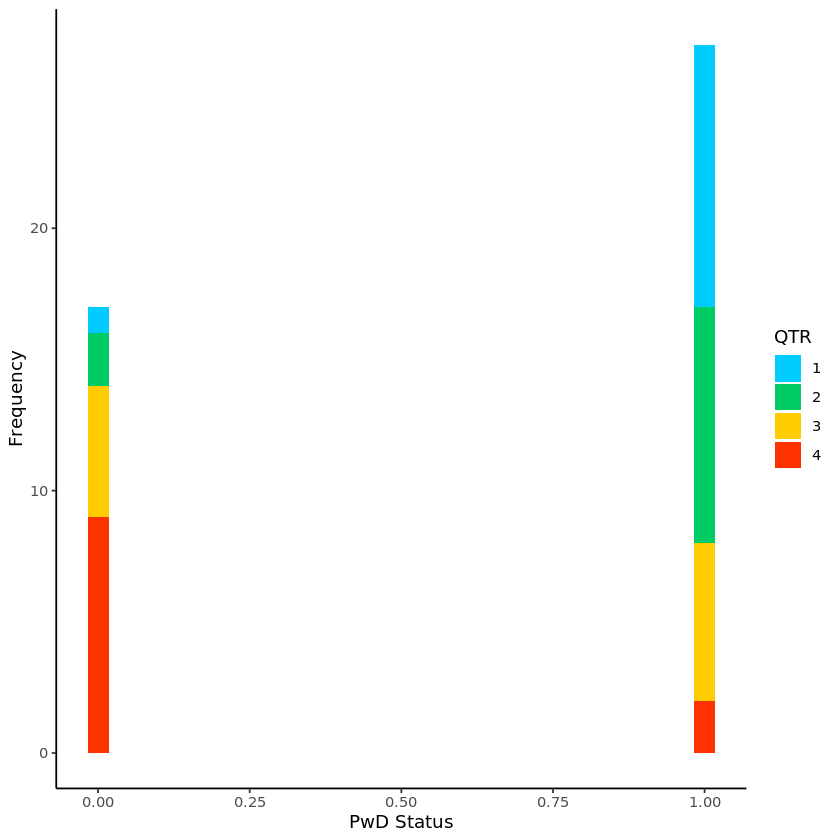

In [27]:
## Histograms

      ggplot(CIBC, aes(Total_Women_Employees, fill = QTR)) +
        geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
        labs(x = 'Total Women Employees', y = 'Frequency') + 
        theme_classic()

      ggplot(CIBC, aes(Woman_Dominated, fill = QTR)) +
        geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
        labs(x = 'Woman Dominated Occupation', y = 'Frequency') + 
        theme_classic()

      ggplot(CIBC, aes(Indigenous, fill = QTR)) +
        geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
        labs(x = 'Indigenous Status', y = 'Frequency') + 
        theme_classic()

      ggplot(CIBC, aes(PwD, fill = QTR)) +
        geom_histogram() + scale_fill_manual(values=c("#00CCFF", "#00CC66", "#FFCC00", "#FF3300")) + 
        labs(x = 'PwD Status', y = 'Frequency') + 
        theme_classic()

In [72]:
## Creating Ordinal Factor Variables
    
    # Ordering the dependent variable: QTR
      CIBC$QTR = factor(CIBC$QTR, levels = c("1", "2", "3", "4"), ordered = TRUE) 
    
    # Ordering the independent variables: Woman_Dominated, Woman, Indigenous, PwD, RP  
      CIBC$Woman_Dominated = factor(CIBC$Woman_Dominated, levels = c("0", "1"), ordered = TRUE)
      CIBC$Woman = factor(CIBC$Woman, levels = c("0", "1"), ordered = TRUE)
      CIBC$Indigenous = factor(CIBC$Indigenous, levels = c("0", "1"), ordered = TRUE)
      CIBC$PwD = factor(CIBC$PwD, levels = c("0", "1"), ordered = TRUE)
  
    # Summary statistics
      summary(CIBC)
    
    # Indicates the number of observations and number of variables
      dim(CIBC)
    
    # Class of object, which is dataframe
      class(CIBC)
    
    # Lists variable types
      str(CIBC)

      Year                                 Subsector      Province 
 Min.   :2017                                   : 0           : 0  
 1st Qu.:2017   Depository Credit Intermediation:44   National:44  
 Median :2017                                                      
 Mean   :2017                                                      
 3rd Qu.:2017                                                      
 Max.   :2017                                                      
                                                                   
                                    Occupational.Group QTR    Total_Employees  
 Administrative and Senior Clerical Personnel: 4       1:11   Min.   :    0.0  
 Clerical Personnel                          : 4       2:11   1st Qu.:    2.0  
 Intermediate Sales and Service Personnel    : 4       3:11   Median :   15.0  
 Middle and Other Managers                   : 4       4:11   Mean   :  701.7  
 Professionals                               : 4        

[1] 44 23

[1] "data.frame"

'data.frame':	44 obs. of  23 variables:
 $ Year                                 : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Subsector                            : Factor w/ 2 levels "","Depository Credit Intermediation": 2 2 2 2 2 2 2 2 2 2 ...
 $ Province                             : Factor w/ 2 levels "","National": 2 2 2 2 2 2 2 2 2 2 ...
 $ Occupational.Group                   : Factor w/ 13 levels "","Administrative and Senior Clerical Personnel",..: 10 10 10 10 5 5 5 5 7 7 ...
 $ QTR                                  : Ord.factor w/ 4 levels "1"<"2"<"3"<"4": 4 3 2 1 4 3 2 1 4 3 ...
 $ Total_Employees                      : int  1 4 8 236 2 12 574 4965 1 4 ...
 $ All.Employees...M                    : int  1 3 6 168 1 10 416 2453 0 3 ...
 $ Male                                 : Ord.factor w/ 2 levels "0"<"1": 2 2 2 2 2 2 2 2 1 2 ...
 $ Total_Women_Employees                : num  0 1 2 68 1 ...
 $ Woman                                : Ord.factor w/ 2 levels "0

In [33]:
## Exploratory Data Analysis

    # Frequency Tables
      table(CIBC$QTR, CIBC$Woman_Dominated)
      table(CIBC$QTR, CIBC$Woman)
      table(CIBC$QTR, CIBC$Indigenous)
      table(CIBC$QTR, CIBC$PwD)

   
    0 1
  1 4 7
  2 7 4
  3 7 4
  4 7 4

   
     0  1
  1  2  9
  2  1 10
  3  1 10
  4  4  7

   
     0  1
  1  2  9
  2  4  7
  3  6  5
  4 11  0

   
     0  1
  1  1 10
  2  2  9
  3  5  6
  4  9  2

In [34]:
install.packages("randomForest")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [35]:
## Partitioning Data
  
    # Dividing data into training and testing sets
    # Random sampling for a 70-30 training/testing split
      samplesize = 0.70*nrow(CIBC)
      set.seed(100)
      index = sample(seq_len(nrow(CIBC)), size = samplesize)
    
    # Creating training and test set 
      CIBCtrain = CIBC[index,]
      CIBCtest = CIBC[-index,]
      
      summary(CIBCtrain)
      summary(CIBCtest)


      Year                                 Subsector      Province 
 Min.   :2017                                   : 0           : 0  
 1st Qu.:2017   Depository Credit Intermediation:30   National:30  
 Median :2017                                                      
 Mean   :2017                                                      
 3rd Qu.:2017                                                      
 Max.   :2017                                                      
                                                                   
                                    Occupational.Group QTR   Total_Employees  
 Semi-Professionals and Technicians          :4        1:9   Min.   :    0.0  
 Skilled Crafts and Trades Workers           :4        2:8   1st Qu.:    2.0  
 Supervisors                                 :4        3:7   Median :   10.5  
 Administrative and Senior Clerical Personnel:3        4:6   Mean   :  792.5  
 Intermediate Sales and Service Personnel    :3              

      Year                                 Subsector      Province 
 Min.   :2017                                   : 0           : 0  
 1st Qu.:2017   Depository Credit Intermediation:14   National:14  
 Median :2017                                                      
 Mean   :2017                                                      
 3rd Qu.:2017                                                      
 Max.   :2017                                                      
                                                                   
                                    Occupational.Group QTR   Total_Employees  
 Skilled Sales and Service Personnel         :3        1:2   Min.   :   1.00  
 Clerical Personnel                          :2        2:3   1st Qu.:   4.25  
 Middle and Other Managers                   :2        3:4   Median :  21.00  
 Semi-Skilled Manual Workers                 :2        4:5   Mean   : 507.00  
 Senior Managers                             :2              

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin




Call:
 randomForest(formula = QTR ~ ., data = CIBCtrain) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 70%
Confusion matrix:
  1 2 3 4 class.error
1 2 4 1 2   0.7777778
2 3 0 4 1   1.0000000
3 1 1 2 3   0.7142857
4 1 0 0 5   0.1666667


Call:
 randomForest(formula = QTR ~ ., data = CIBCtrain, ntree = 600,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 600
No. of variables tried at each split: 2

        OOB estimate of  error rate: 76.67%
Confusion matrix:
  1 2 3 4 class.error
1 2 5 0 2   0.7777778
2 3 0 4 1   1.0000000
3 1 3 0 3   1.0000000
4 1 0 0 5   0.1666667

         
predTrain 1 2 3 4
        1 8 0 0 0
        2 0 7 0 0
        3 0 0 6 0
        4 1 1 1 6

         
predValid 1 2 3 4
        1 2 2 1 0
        2 0 0 1 0
        3 0 1 1 2
        4 0 0 1 3

,1,2,3,4,MeanDecreaseAccuracy,MeanDecreaseGini
Year,0.0000000,0.0000000,0.0000000,0.0000000,0.000000000,0.0000000
Subsector,0.0000000,0.0000000,0.0000000,0.0000000,0.000000000,0.0000000
Province,0.0000000,0.0000000,0.0000000,0.0000000,0.000000000,0.0000000
Occupational.Group,-2.6059346,-2.3627127,-3.3939436,-2.1571392,-4.623160639,1.6436139
Total_Employees,2.5955006,-2.6606781,-1.4565089,7.6146317,4.725804933,1.6303525
All.Employees...M,1.2659616,-3.1020429,-2.6418609,4.0229445,0.002287655,1.2638994
Male,-0.6207641,1.2547687,-1.9890065,-1.3589880,-2.273426447,0.2165075
Total_Women_Employees,4.4320512,-1.8823710,0.4800363,5.7988329,4.375921279,1.3578339
Woman,0.4968895,0.1015355,0.7922113,-5.0348201,-3.371473595,0.2660117
Woman_Dominated,0.9137593,-1.1475824,-2.1813871,-2.3051838,-2.373996831,0.2684802


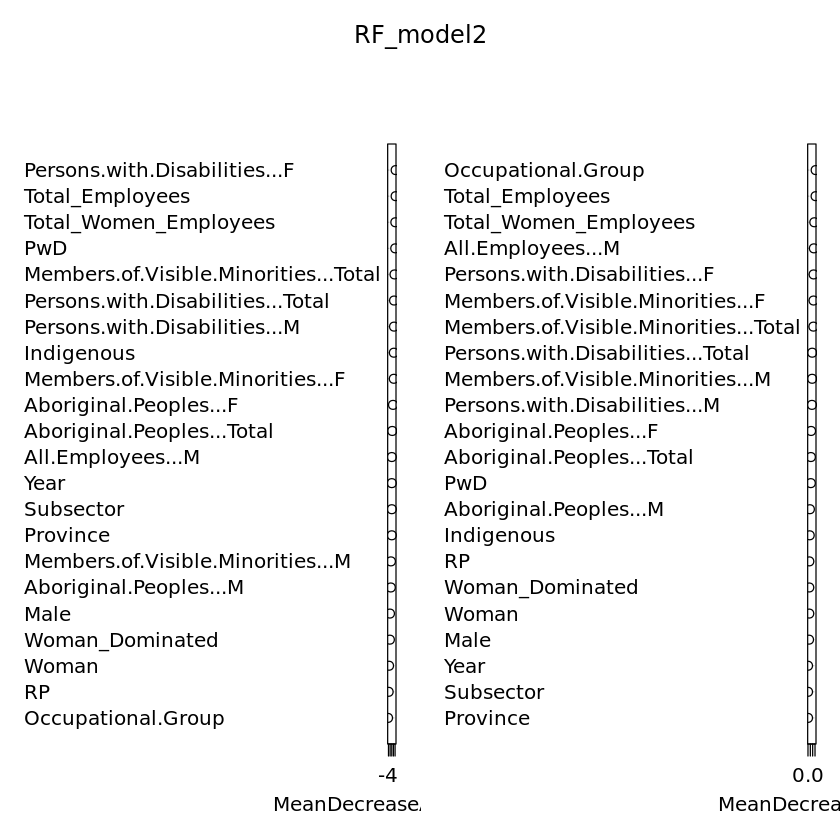

In [37]:
## Random Forests - Classification Algorithm
  
      library(randomForest)
    
    # Default number of splits is 4.
      RF_model <- randomForest(QTR ~ ., data = CIBCtrain)
      RF_model
  
    # Adjusting parameters of Random Forest model to reduce error rate
      RF_model2 <- randomForest(QTR ~ ., data = CIBCtrain, ntree = 600, mtry = 2, importance = TRUE)
      RF_model2
  
    # Predicting on train set
      predTrain <- predict(RF_model2, CIBCtrain, type = "class")
    # Checking classification accuracy
      table(predTrain, CIBCtrain$QTR)
  
    # Predicting on Validation set
      predValid <- predict(RF_model2, CIBCtest, type = "class")
    # Checking classification accuracy
      table(predValid,CIBCtest$QTR)
  
    # To check important variables
      importance(RF_model2)
    # Visual to show ranking of important variables
      varImpPlot(RF_model2)


In [38]:
install.packages("car")

Warning message:
“dependency ‘pbkrtest’ is not available”Warning message in install.packages("car"):
“installation of package ‘car’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


The following ordinal logit models are supposed to analyze individual women employees and the likelihood of them achieving a higher salary quartile. The models also try to observe the impact the status of being an Indigenous person or a person with disabilities has on the likelihood of individual employees achieving a higher salary quartile as well.

In [53]:
## Ordinal Logit Model 1
    
    library(MASS)
    
      logmodel <- polr(QTR ~ Total_Women_Employees + Indigenous + PwD, data = CIBC, Hess = TRUE)
      summary(logmodel)
      
    # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
      summary_table <- coef(summary(logmodel))
      pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
      summary_table <- cbind(summary_table, "p value" = round(pval,3))
      summary_table
      

Call:
polr(formula = QTR ~ Total_Women_Employees + Indigenous + PwD, 
    data = CIBC, Hess = TRUE)

Coefficients:
                           Value Std. Error t value
Total_Women_Employees -0.0007174   0.000435  -1.649
Indigenous.L          -1.0491852   0.512589  -2.047
PwD.L                 -1.1107415   0.521221  -2.131

Intercepts:
    Value   Std. Error t value
1|2 -2.0831  0.4906    -4.2459
2|3 -0.4425  0.3934    -1.1247
3|4  1.2745  0.4388     2.9043

Residual Deviance: 96.37167 
AIC: 108.3717 

,Value,Std. Error,t value,p value
Total_Women_Employees,-0.000717383,0.0004350339,-1.649028,0.099
Indigenous.L,-1.049185237,0.5125888864,-2.046836,0.041
PwD.L,-1.110741484,0.5212207577,-2.131038,0.033
1|2,-2.083132013,0.4906199796,-4.245918,0.000
2|3,-0.442495863,0.3934192150,-1.124744,0.261
3|4,1.274468797,0.4388238064,2.904284,0.004


In [43]:
install.packages("effects")

also installing the dependencies ‘mitools’, ‘survey’, ‘estimability’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


The following visuals attempt to show the individual impacts of each x-variable on achieving a higher salary quartile.
Interaction effects are shown as well to see the added impacts that Indigenous or PwD status has on women employees regarding the likelihood of them achieving a higher salary quartile.

Loading required package: carData
lattice theme set by effectsTheme()
See ?effectsTheme for details.


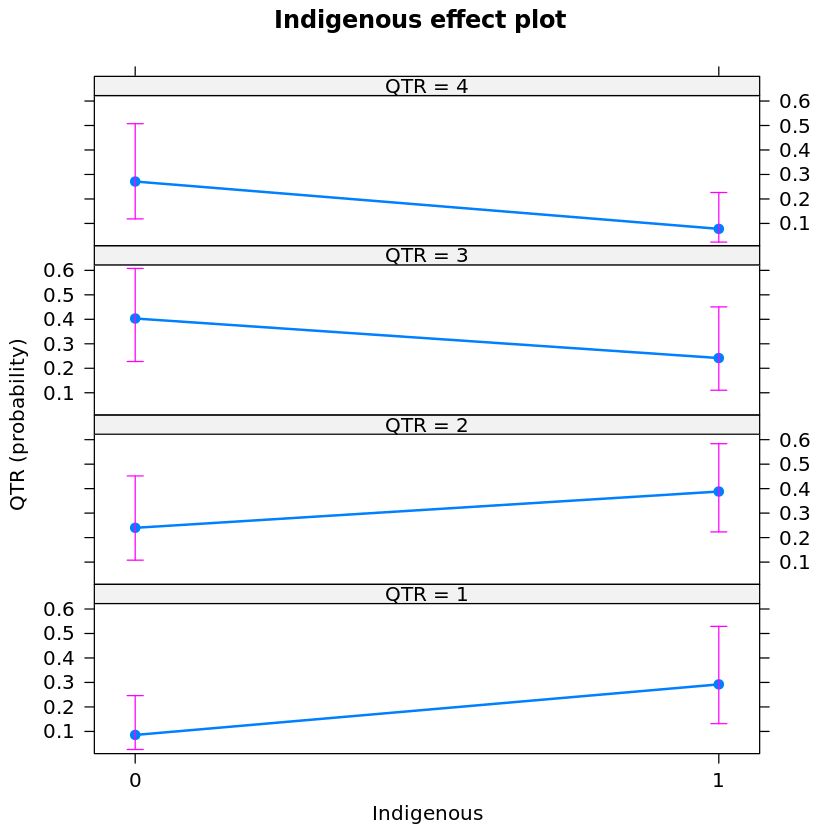

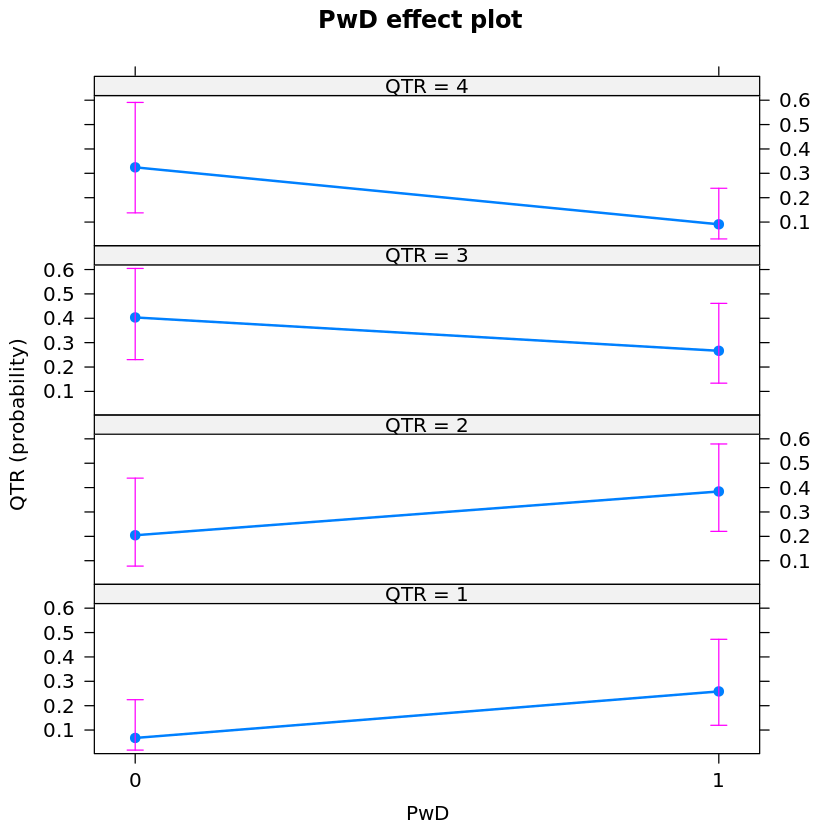

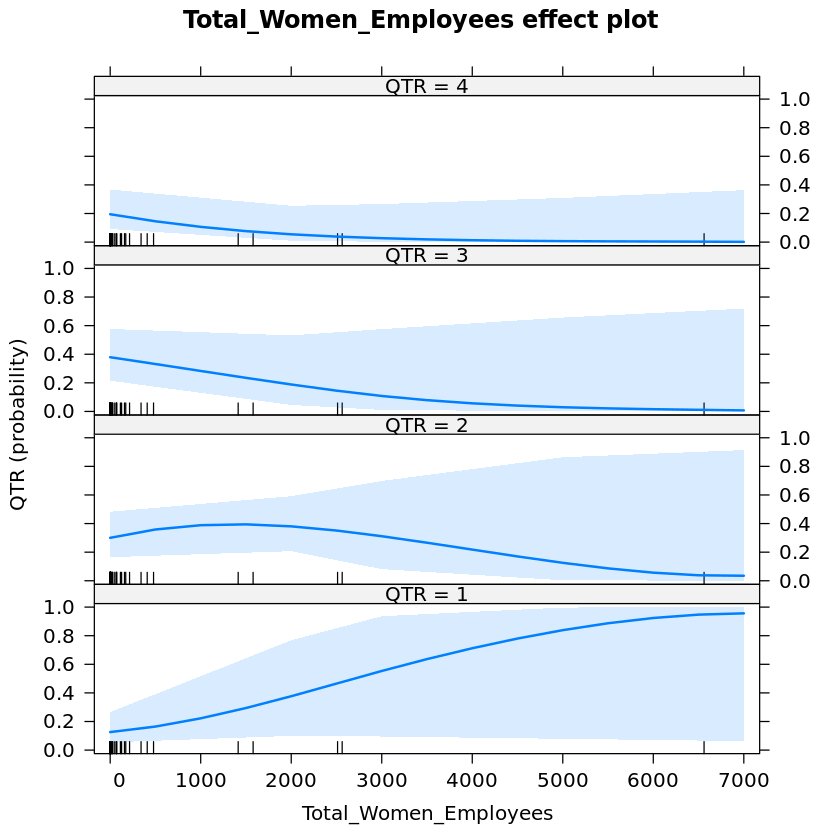

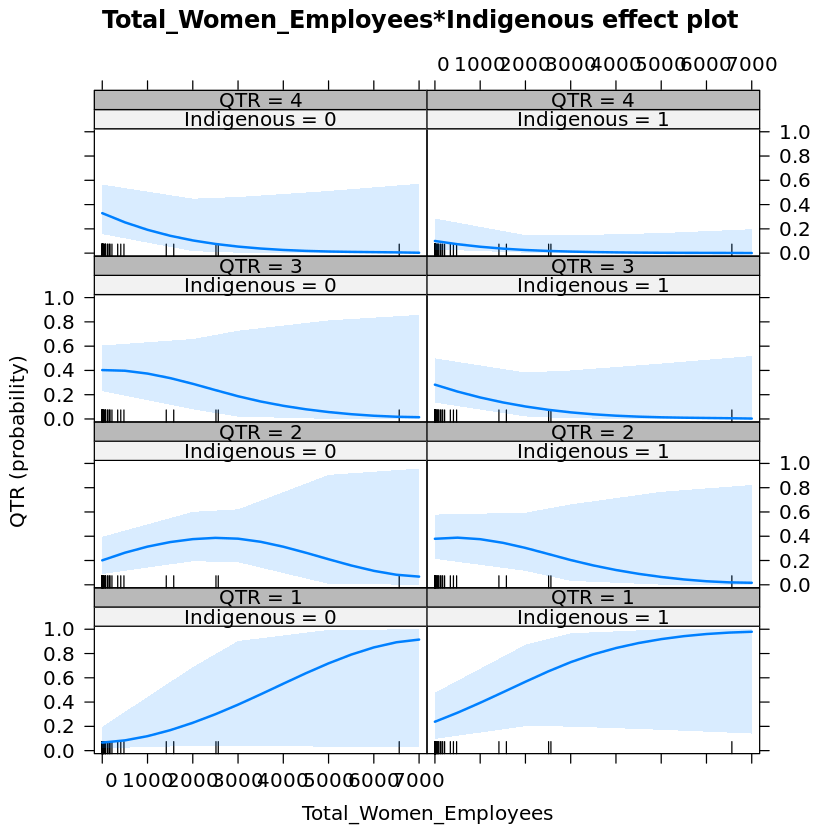

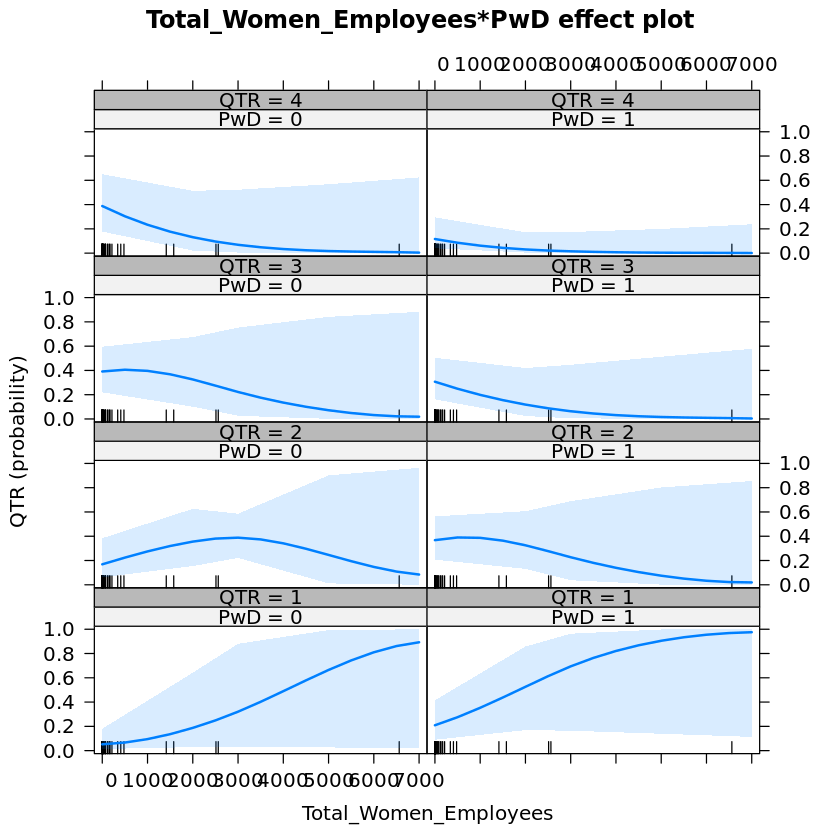

In [44]:
## Visuals to interpret regression results
 
      library("effects")

    # Individual effects  
      plot(Effect(focal.predictors = "Indigenous",logmodel))
      plot(Effect(focal.predictors = "PwD",logmodel))
      plot(Effect(focal.predictors = "Total_Women_Employees",logmodel))
    
    # Interaction effect of Indigenous background and Total_Women_Employees on achieving a specific salary QTR
      plot(Effect(focal.predictors = c("Total_Women_Employees", "Indigenous"),logmodel))
    
    # Interaction effect of PwD status and Total_Women_Employees on achieving a specific salary QTR
      plot(Effect(focal.predictors = c("Total_Women_Employees", "PwD"),logmodel))

In [66]:
## Ordinal Logit Model 2

    # Woman_Dominated variable represents occupations with mostly women employees

    # Used to compare with logmodel
    logmodel2a <- polr(QTR ~ Total_Employees + Woman_Dominated + Indigenous + PwD, data = CIBC, Hess = TRUE)
    # Used for classification algorithm
    logmodel2 <- polr(QTR ~ Total_Employees + Woman_Dominated + Indigenous + PwD, data = CIBCtrain, Hess = TRUE)
      summary(logmodel2)
  
    # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
      summary_table <- coef(summary(logmodel2))
      pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
      summary_table <- cbind(summary_table, "p value" = round(pval,3))
      summary_table


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Call:
polr(formula = QTR ~ Total_Employees + Woman_Dominated + Indigenous + 
    PwD, data = CIBCtrain, Hess = TRUE)

Coefficients:
                       Value Std. Error t value
Total_Employees   -0.0001872  0.0003524 -0.5311
Woman_Dominated.L  0.0099915  0.5489699  0.0182
Indigenous.L      -1.0027571  0.6543897 -1.5324
PwD.L             -1.3442287  0.6634978 -2.0260

Intercepts:
    Value   Std. Error t value
1|2 -1.6784  0.5797    -2.8952
2|3 -0.0169  0.5218    -0.0324
3|4  1.7581  0.6140     2.8632

Residual Deviance: 65.50896 
AIC: 79.50896 

,Value,Std. Error,t value,p value
Total_Employees,-0.0001871501,0.0003524035,-0.53106753,0.595
Woman_Dominated.L,0.0099915223,0.5489698910,0.01820049,0.985
Indigenous.L,-1.0027570865,0.6543896786,-1.53235468,0.125
PwD.L,-1.3442287194,0.6634977816,-2.02597319,0.043
1|2,-1.6783623124,0.5797028052,-2.89521165,0.004
2|3,-0.0169161433,0.5218461090,-0.03241596,0.974
3|4,1.7581027923,0.6140360227,2.86319162,0.004


In [46]:
 ## Classification using test set
  
    # Computes confusion matrix
      predictQTR = predict(logmodel2,CIBCtest)
      table(CIBCtest$QTR, predictQTR)
  
    # Misclassification error in decimal form
      mean(as.character(CIBCtest$QTR) != as.character(predictQTR))

   predictQTR
    1 2 3 4
  1 2 0 0 0
  2 2 1 0 0
  3 2 0 1 1
  4 0 2 0 3

[1] 0.5

In [67]:
## Ordinal Logit Model 3

    # Used to compare with logmodel
    logmodel3a <- polr(QTR ~ Woman + Indigenous + PwD, data = CIBC, Hess = TRUE)
    # Used for classification algorithm
    logmodel3 <- polr(QTR ~ Woman + Indigenous + PwD, data = CIBCtrain, Hess = TRUE)
      summary(logmodel3)
  
    # Calculates p-values for estimated coefficients and intercepts to determine statistical significance
      summary_table <- coef(summary(logmodel3))
      pval <- pnorm(abs(summary_table[, "t value"]), lower.tail = FALSE) * 2
      summary_table <- cbind(summary_table, "p value" = round(pval,3))
      summary_table


Call:
polr(formula = QTR ~ Woman + Indigenous + PwD, data = CIBCtrain, 
    Hess = TRUE)

Coefficients:
              Value Std. Error t value
Woman.L       1.563     0.8003   1.953
Indigenous.L -1.529     0.6702  -2.281
PwD.L        -1.815     0.7047  -2.575

Intercepts:
    Value   Std. Error t value
1|2 -0.9842  0.5936    -1.6581
2|3  0.7957  0.6078     1.3092
3|4  2.7647  0.8098     3.4141

Residual Deviance: 62.27094 
AIC: 74.27094 

,Value,Std. Error,t value,p value
Woman.L,1.5632832,0.8002621,1.953464,0.051
Indigenous.L,-1.5287928,0.6701655,-2.281217,0.023
PwD.L,-1.8146119,0.7047066,-2.574989,0.010
1|2,-0.9842264,0.5936020,-1.658058,0.097
2|3,0.7956967,0.6077708,1.309205,0.190
3|4,2.7647359,0.8098052,3.414075,0.001


In [51]:
## Classification using test set
  
    # Computes confusion matrix
      predictQTR = predict(logmodel3,CIBCtest)
      table(CIBCtest$QTR, predictQTR)
    
    # Misclassification error in decimal form
      mean(as.character(CIBCtest$QTR) != as.character(predictQTR))

   predictQTR
    1 2 3 4
  1 2 0 0 0
  2 2 0 1 0
  3 2 0 1 1
  4 0 0 4 1

[1] 0.7142857

In [56]:
install.packages("jtools")

also installing the dependency ‘pander’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [58]:
install.packages("huxtable")

also installing the dependency ‘memoise’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [59]:
install.packages("broom")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [60]:
install.packages("broom.mixed")

also installing the dependencies ‘coda’, ‘TMB’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [61]:
install.packages("ggstance")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [68]:
# Tabular Comparison of logit models

    library(jtools)
    library(huxtable)

    export_summs(logmodel, logmodel2a, scale = TRUE, model.names = c("logmodel", "logmodel2"), error_format = "[{conf.low}, {conf.high}]")
    export_summs(logmodel, logmodel3a, scale = TRUE, model.names = c("logmodel", "logmodel3"), error_format = "[{conf.low}, {conf.high}]")
    export_summs(logmodel2a, logmodel3a, scale = TRUE, model.names = c("logmodel2", "logmodel3"), error_format = "[{conf.low}, {conf.high}]")
    

Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”

names,logmodel,logmodel2
<chr>,<chr>,<chr>
,logmodel,logmodel2
1|2,-2.08313201277097,-2.10729594502922
,"[NA, NA]","[NA, NA]"
2|3,-0.442495862523826,-0.483025865754311
,"[NA, NA]","[NA, NA]"
3|4,1.27446879695431,1.2510430640115
,"[NA, NA]","[NA, NA]"
Indigenous.L,-1.04918523743028,-1.08143521934115
,"[-2.10071909693677, -0.0538281406649886]","[-2.13283204190908, -0.0847605209277018]"


Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”

names,logmodel,logmodel3
<chr>,<chr>,<chr>
,logmodel,logmodel3
1|2,-2.08313201277097,-1.43833535507062
,"[NA, NA]","[NA, NA]"
2|3,-0.442495862523826,0.146195528503719
,"[NA, NA]","[NA, NA]"
3|4,1.27446879695431,1.89285864355814
,"[NA, NA]","[NA, NA]"
Indigenous.L,-1.04918523743028,-1.43945458805027
,"[-2.10071909693677, -0.0538281406649886]","[-2.50554015698409, -0.447168494404266]"


Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”Warning message in FUN(X[[i]], ...):
“tidy() does not return p values for models of class data.frame; significance stars not printed.”

names,logmodel2,logmodel3
<chr>,<chr>,<chr>
,logmodel2,logmodel3
1|2,-2.10729594502922,-1.43833535507062
,"[NA, NA]","[NA, NA]"
2|3,-0.483025865754311,0.146195528503719
,"[NA, NA]","[NA, NA]"
3|4,1.2510430640115,1.89285864355814
,"[NA, NA]","[NA, NA]"
Indigenous.L,-1.08143521934115,-1.43945458805027
,"[-2.13283204190908, -0.0847605209277018]","[-2.50554015698409, -0.447168494404266]"


If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


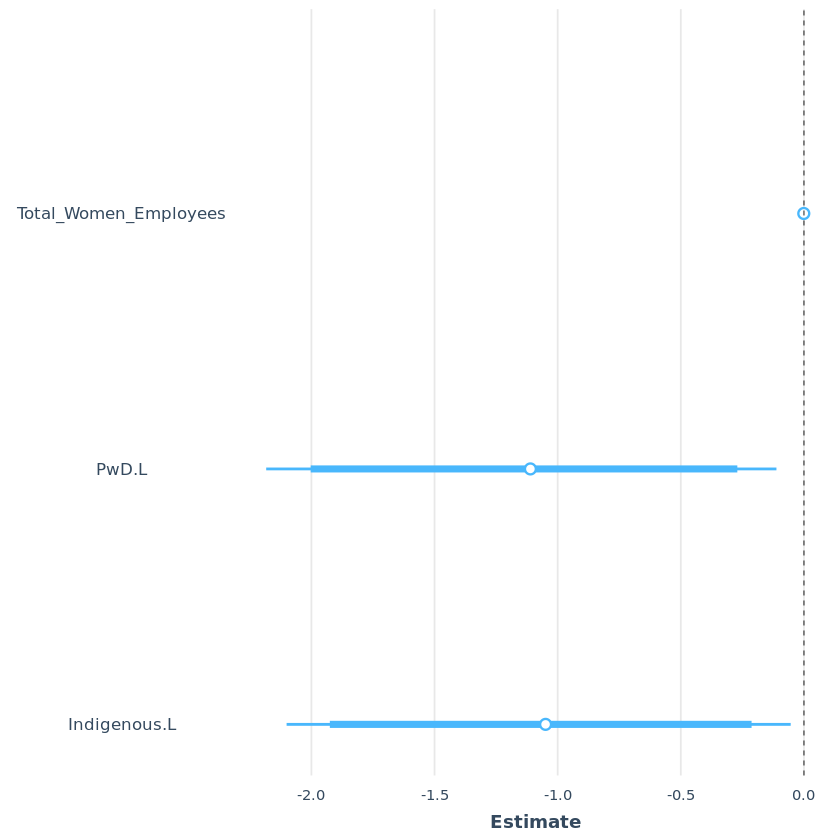

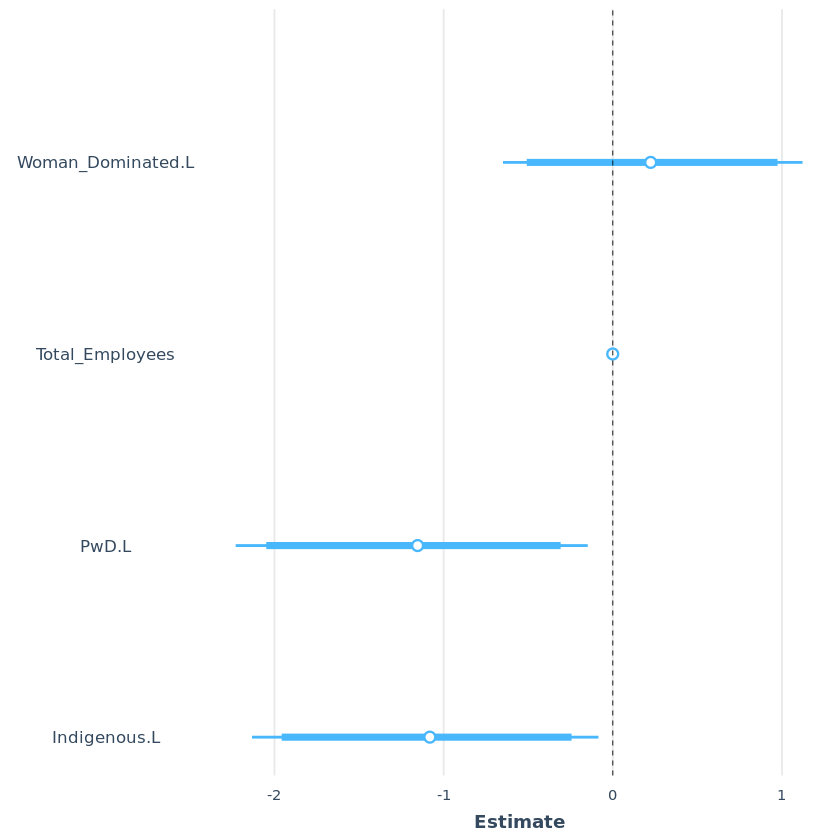

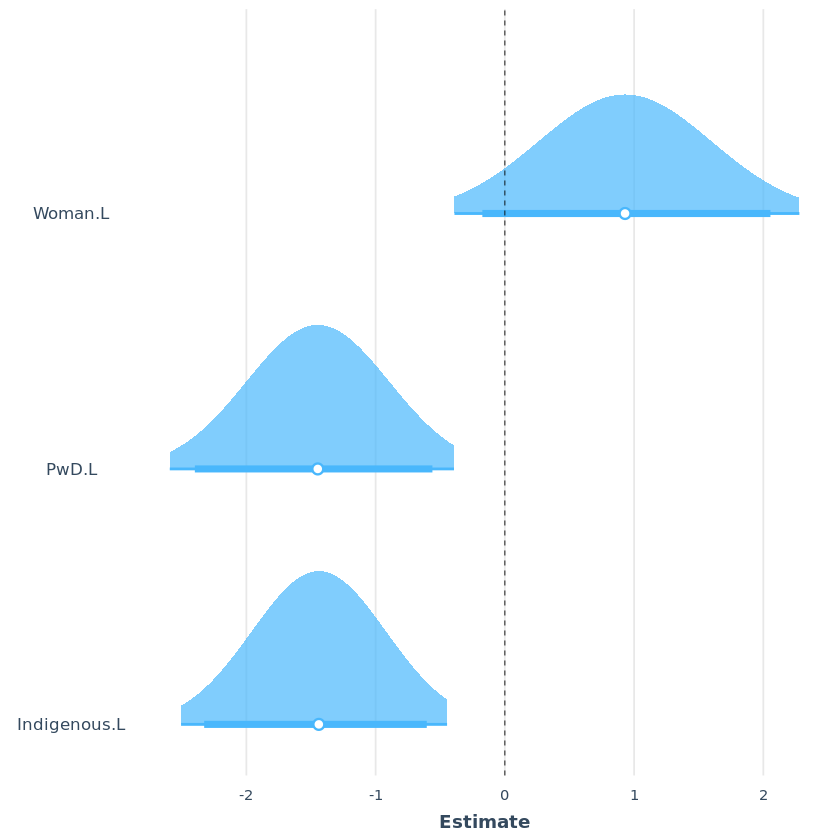

In [70]:
# Visual for indiviual logit model's predicted coefficients

    plot_summs(logmodel, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .9, model.names = c("logmodel"))
    plot_summs(logmodel2a, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .9, model.names = c("logmodel2"))
    plot_summs(logmodel3a, scale = TRUE, plot.distributions = TRUE, inner_ci_level = .9, model.names = c("logmodel3"))


If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


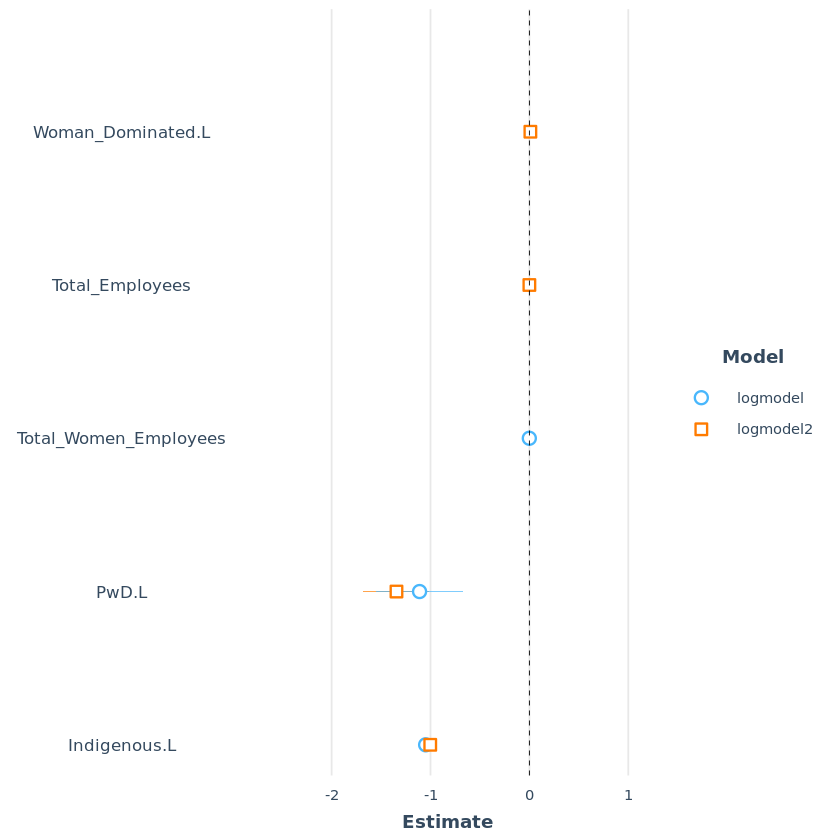

If some of the distribution curves are too short to see, consider rescaling
your model coefficients or using the rescale.distributions = TRUE argument.


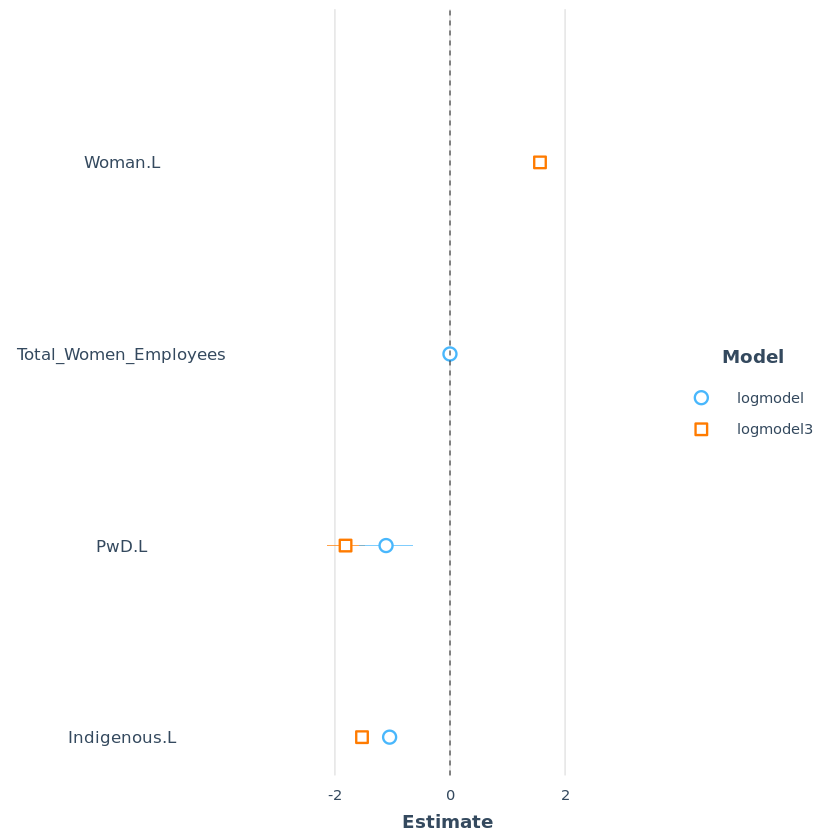

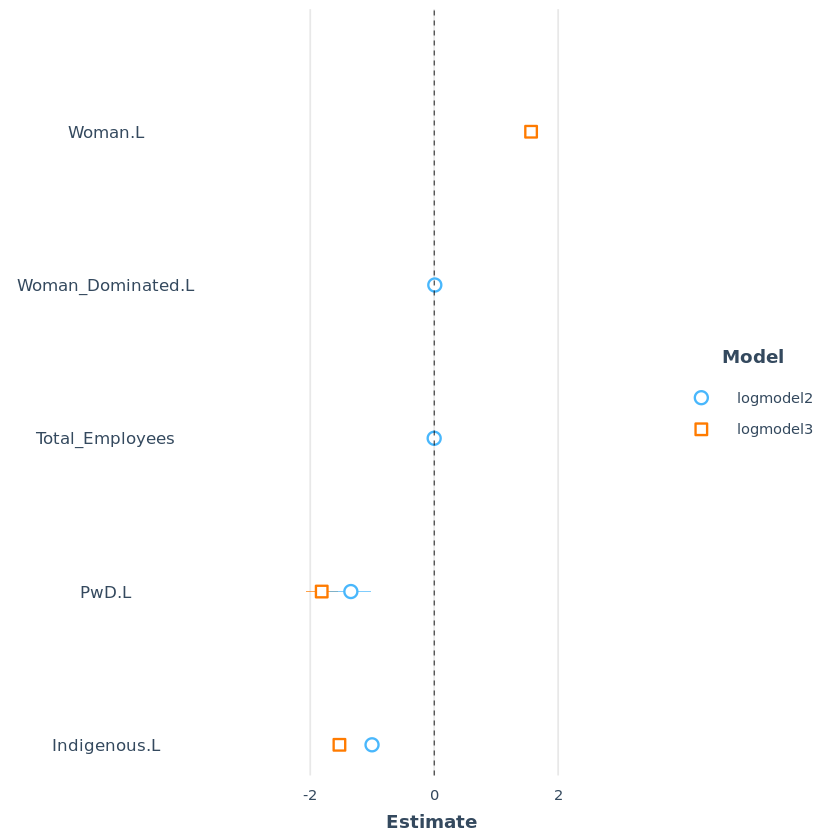

In [71]:
# Visual to compare logit models' predicted coefficients

    plot_summs(logmodel, logmodel2, scale = TRUE, plot.distributions = TRUE, model.names = c("logmodel", "logmodel2"))
    plot_summs(logmodel, logmodel3, scale = TRUE, plot.distributions = TRUE, model.names = c("logmodel", "logmodel3"))
    plot_summs(logmodel2, logmodel3, scale = TRUE, plot.distributions = TRUE, model.names = c("logmodel2", "logmodel3"))
